# BM 336546- Machine Learning in Health care - HW2: Type 1 Diabetes
Sagi Ben Izthak - 307885152

Shir Ricon - 204632780

# PART I: Data Exploration


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import random

random.seed(10)
file = Path.cwd().joinpath('HW2_data.csv')
T1D_dataset = pd.read_csv(file)

Preprocessing:

In [2]:

from HW2_functions import rm_nan_pat as rm
T1D_df_str = rm(T1D_dataset)
col_names = T1D_df_str.columns
T1D_df = pd.get_dummies(T1D_df_str, drop_first=True)
cols = T1D_df.columns.tolist()
cols = cols[0:1] + cols[2:17] + cols[1:2] + cols[-1:]
T1D_df = T1D_df[cols]
T1D_df.columns = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Family History', 'Diagnosis']


T1D_feats = T1D_df.copy()
del T1D_feats['Diagnosis']
Diagnosis = T1D_df[['Diagnosis']]

Train tes split:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(T1D_feats,np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))

# Visualization of the Data

First lets show the distribution of the features and compare them with respect to the diagnosis. We will do that by comparing the percent of positive feature (defined by 'Male for gender, '1' for Family Hisotry, and 'Yes' for the rest) between the train set and the test set for all binary features. In addition we will compare the percent of the Positive diagnosis between the train set and the train set to verify that the stratification we excuted worked:

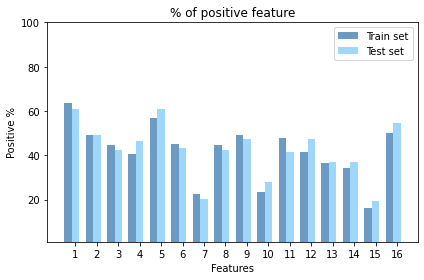

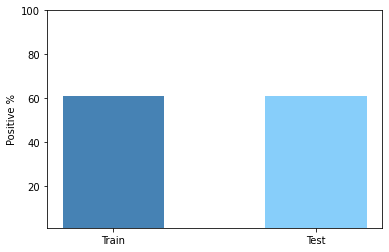

In [4]:
from HW2_functions import col_charts as c_ch
feat_remove = ['Age']
c_ch(X_train,X_test,feat_remove, y_train,y_test)

We can conclude that for all 16 features the distribution of the features is similar between the train set and the test set. For the Diagnosis, as expected, we can see that the distriburion is identical due the stratification we performed.

Now we would like to examine the relationship between the features and the lable(Diagnosis). We will do that by showing the distribution of the diagnosis for both the positive feature population(right pair of bar plots) and negative feature population (left pair of bar plots) for all teh binary features:

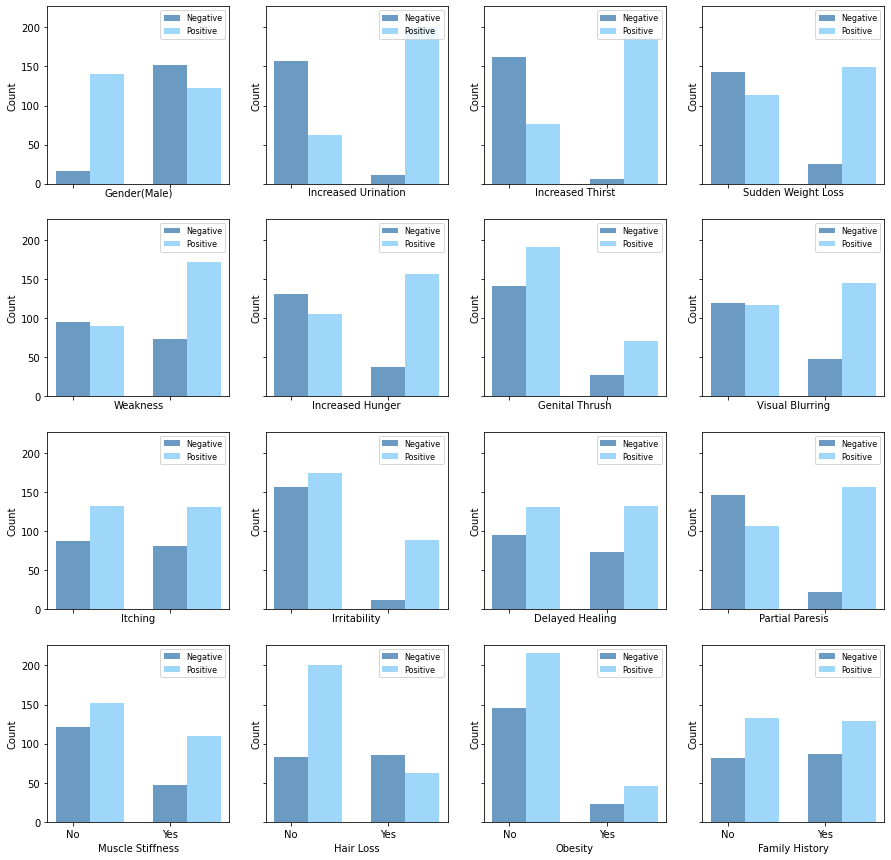

In [5]:
from HW2_functions import feat_lable as ft_lb
remove_feat = 'Age'
ft_lb(X_train,remove_feat, y_train)

# Linear model - Logistic Regression

In [6]:
from HW2_functions import cv_kfold
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

C = [0.001,0.01,0.25,0.5,0.75,1,1.25,1.5,1.75,2,3,4,5,10,20,50] 
K = 5 
val_dict = cv_kfold(X_train, y_train, C=C, penalty=['l1', 'l2'], K=K)
for idx, elem in enumerate(val_dict):
       print("For C=%.3f and penalty=%s the AUC is: %.3f" % (val_dict[idx].get('C'), val_dict[idx].get('penalty'), val_dict[idx].get('AUC')))

C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

For C=0.001 and penalty=l1 the AUC is: 0.500
For C=0.001 and penalty=l2 the AUC is: 0.947
For C=0.010 and penalty=l1 the AUC is: 0.500
For C=0.010 and penalty=l2 the AUC is: 0.957
For C=0.250 and penalty=l1 the AUC is: 0.968
For C=0.250 and penalty=l2 the AUC is: 0.972
For C=0.500 and penalty=l1 the AUC is: 0.970
For C=0.500 and penalty=l2 the AUC is: 0.974
For C=0.750 and penalty=l1 the AUC is: 0.970
For C=0.750 and penalty=l2 the AUC is: 0.973
For C=1.000 and penalty=l1 the AUC is: 0.970
For C=1.000 and penalty=l2 the AUC is: 0.973
For C=1.250 and penalty=l1 the AUC is: 0.971
For C=1.250 and penalty=l2 the AUC is: 0.973
For C=1.500 and penalty=l1 the AUC is: 0.971
For C=1.500 and penalty=l2 the AUC is: 0.973
For C=1.750 and penalty=l1 the AUC is: 0.969
For C=1.750 and penalty=l2 the AUC is: 0.973
For C=2.000 and penalty=l1 the AUC is: 0.969
For C=2.000 and penalty=l2 the AUC is: 0.973
For C=3.000 and penalty=l1 the AUC is: 0.970
For C=3.000 and penalty=l2 the AUC is: 0.972
For C=4.00

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

C = 1 
penalty = 'l2' 
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_proba_train = logreg.predict_proba(X_train)
AUC_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
loss_train = log_loss(y_train, y_pred_train)

y_pred_test = logreg.predict(X_test)
y_pred_proba_test = logreg.predict_proba(X_test)
AUC_test = roc_auc_score(y_test, y_pred_proba_test[:,1])
loss_test = log_loss(y_test, y_pred_test)

# Training set:

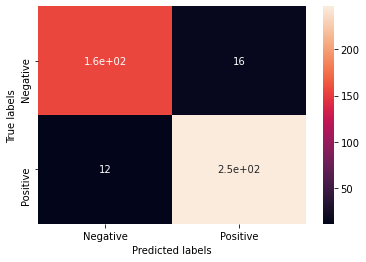

Evaluation metrics for the training set:
AUC is: 0.982
The loss is: 2.249
F1 score is: 93.19%
Accuracy is: 93.49%


In [12]:
from sklearn import metrics
cnf_matrix_train = metrics.confusion_matrix(y_pred_train, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train))
print('The loss is: %.3f' % (loss_train))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train))) + "%")

# Test set:

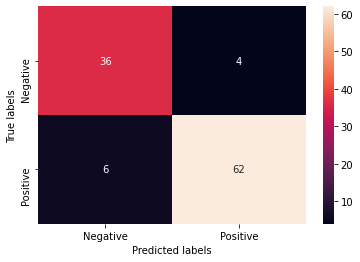

Evaluation metrics for the test set:
AUC is: 0.960
The loss is: 3.198
F1 score is: 90.17%
Accuracy is: 90.74%


In [13]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test))
print('The loss is: %.3f' % (loss_test))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test))) + "%")

# Non-linear model - SVM